#Project 2- To perform EDA and train the machine to check whether a person will claim or not 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Importing CSV data file
df_insurance=pd.read_csv('SBI_Life_insurance.csv')
df_insurance

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [117]:
# Checking datatypes of each variables
df_insurance.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [4]:
#Checking for null values
df_insurance.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [7]:
#Checking description of dataset
df_insurance.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [9]:
df_insurance.shape

(1338, 8)

--Performing EDA for the above data to get insight of data--

In [8]:
# Performing EDA for the above data
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
#Checking for Claim counts
df_insurance['insuranceclaim'].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

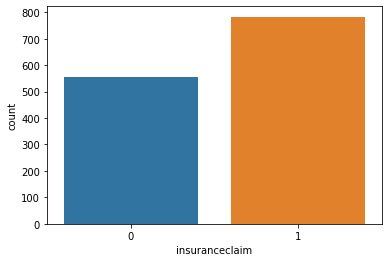

In [30]:
sns.countplot(df_insurance['insuranceclaim'])
plt.show()

From above plots we can see that people who have taken claim are more

In [13]:
#To get the insight about the claims we have to set aside the data of people who get claim
claim=df_insurance.loc[df_insurance["insuranceclaim"]==1]
claim

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.90,0,1,3,16884.92400,1
1,18,1,33.77,1,0,2,1725.55230,1
4,32,1,28.88,0,0,1,3866.85520,1
6,46,0,33.44,1,0,2,8240.58960,1
10,25,1,26.22,0,0,0,2721.32080,1
...,...,...,...,...,...,...,...,...
1330,57,0,25.74,2,0,2,12629.16560,1
1331,23,0,33.40,0,0,3,10795.93733,1
1334,18,0,31.92,0,0,0,2205.98080,1
1335,18,0,36.85,0,0,2,1629.83350,1


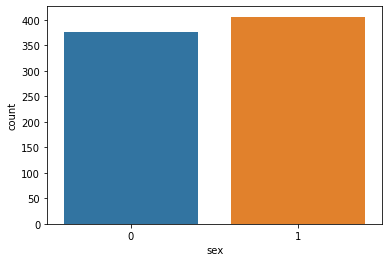

In [29]:
#Checking for claim ratios over sex
sns.countplot(claim['sex'])
plt.show()

In [15]:
claim['sex'].value_counts()

1    406
0    377
Name: sex, dtype: int64

We can see that almost same number of male and female have taken claims

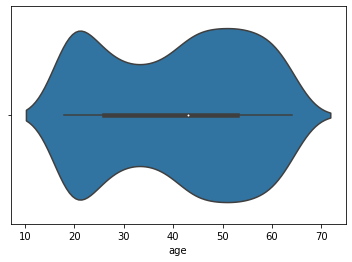

In [28]:
# Checking for the age group who have taken claims
sns.violinplot(claim['age'])
plt.show()

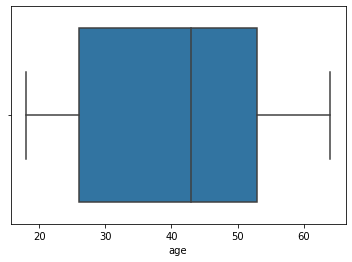

In [27]:
sns.boxplot(claim['age'])
plt.show()

People Ranging from 18-22 and 45-60 years of age have taken maximum number of claims

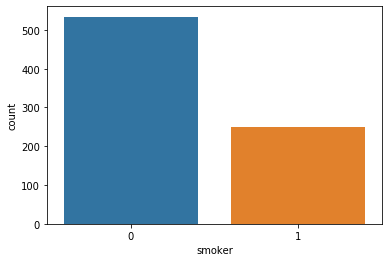

In [26]:
# Checking for the group who smokes or not have taken claims
sns.countplot(claim['smoker'])
plt.show()

We can see that people who are non-smokers have taken more claims ;)

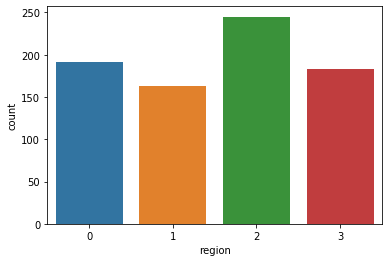

In [25]:
# Checkinh for claims taken by people region wise 
sns.countplot(claim['region'])
plt.show()

We can see that people living in region 2 have taken more claims over people living in other

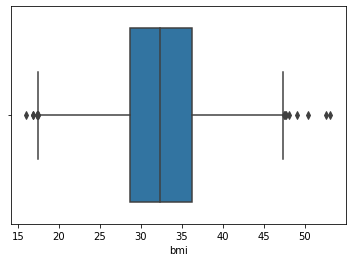

In [23]:
# Checkinh for claims with respect to BMI of people
sns.boxplot(claim['bmi'])
plt.show()

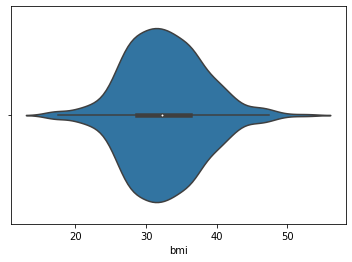

In [24]:
sns.violinplot(claim['bmi'])
plt.show()

We can see that people have BMI in the range of 28-38 have taken more claims

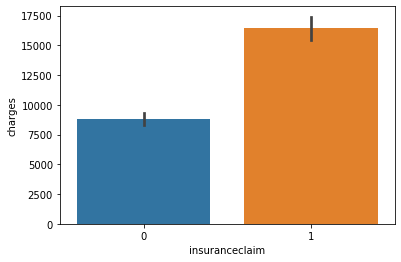

In [32]:
# Checking for the charges paid by the person who have taken claims and who have not taken claims
sns.barplot(x="insuranceclaim",y="charges",data=df_insurance)
plt.show()

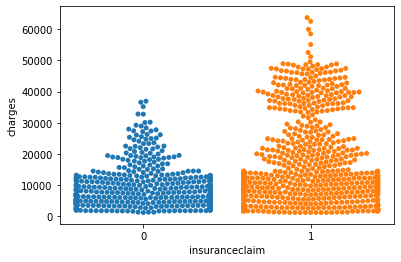

In [39]:
sns.swarmplot(x="insuranceclaim",y="charges",data=df_insurance)
plt.show()

We can see that person who are paying more for the policy have taken more claims

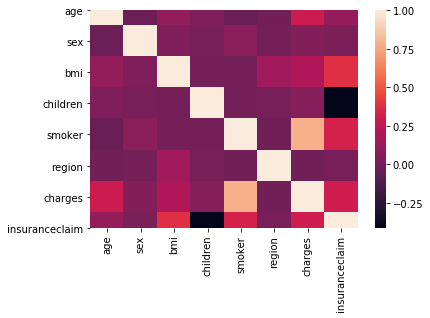

In [33]:
#Checking Correlation by using heatmap plot
sns.heatmap(df_insurance.corr())

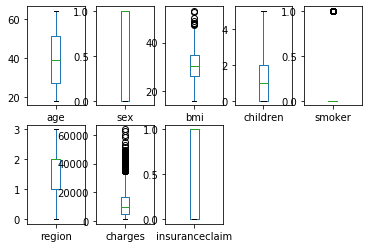

In [50]:
#Checking for outliers using box plot
df_insurance.plot(kind='box',subplots=True, layout=(2,5))
plt.show()

We can see that outliers are there in the data

In [55]:
# Removing Outliers using Z score
from scipy.stats import zscore
z_score=abs(zscore(df_insurance))
z_score

array([[1.43876426, 1.0105187 , 0.45332   , ..., 1.34390459, 0.2985838 ,
        0.84190989],
       [1.50996545, 0.98959079, 0.5096211 , ..., 0.43849455, 0.95368917,
        0.84190989],
       [0.79795355, 0.98959079, 0.38330685, ..., 0.43849455, 0.72867467,
        1.18777557],
       ...,
       [1.50996545, 1.0105187 , 1.0148781 , ..., 0.43849455, 0.96159623,
        0.84190989],
       [1.29636188, 1.0105187 , 0.79781341, ..., 1.34390459, 0.93036151,
        1.18777557],
       [1.55168573, 1.0105187 , 0.26138796, ..., 0.46691549, 1.31105347,
        0.84190989]])

In [56]:
print(df_insurance.shape)
thresold=3
insurance_new=df_insurance[(z_score<3).all(axis=1)]
insurance_new.shape

(1338, 8)


(1309, 8)

We can see that outliers are removed using z score method

** Training our machine to get best prediction model **

In [57]:
#Separating the input and output variables
x=insurance_new.drop(columns=["insuranceclaim"])
y=insurance_new[["insuranceclaim"]]

In [58]:
x.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [59]:
y.head()

,insuranceclaim
0,1
1,1
2,0
3,0
4,1


In [82]:
#Using standard scalar method to Normalize our data or to bring all variable to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[-1.43906316, -1.00536197, -0.44935891, ...,  1.98484827,
         1.35275274,  0.32345355],
       [-1.5100858 ,  0.99466663,  0.53339072, ..., -0.50381685,
         0.44745962, -0.96849975],
       [-0.79985933,  0.99466663,  0.40447808, ..., -0.50381685,
         0.44745962, -0.73635529],
       ...,
       [-1.5100858 , -1.00536197,  1.04904129, ..., -0.50381685,
         0.44745962, -0.97665735],
       [-1.29701786, -1.00536197, -0.80093884, ..., -0.50381685,
         1.35275274, -0.94443291],
       [ 1.54388803, -1.00536197, -0.25347866, ...,  1.98484827,
        -0.45783349,  1.36800497]])

In [107]:
#Checking for best random state which give best accuracy/f1 score for various training techniques used to get best prediction
# Defining a class to check for best random state and f1 score.
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
def maxf1_score(tec,x,y):
    maxf1=0
    rand=0
    for r_state in range(42,100):
        train_x,test_x,train_y,test_y=train_test_split(x, y,random_state = r_state,test_size=0.20,stratify=y)
        tec.fit(x_train,y_train)
        y_pred=tec.predict(x_test)
        temp=f1_score(y_test,y_pred)
        if temp>maxf1:
            maxf1=temp
            rand=r_state
    print("Maximum f1_score is: ",maxf1, "at random state : ",rand)

-- As we can see that the above data is a classification type data so we use Classifiers Techniques to train our model --

In [86]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score 
import warnings
warnings.filterwarnings("ignore")

In [109]:
 train_x,test_x,train_y,test_y=train_test_split(x, y,test_size=0.20,stratify=y)

In [104]:
# Importing various libraries that we are using to train our model

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
import sklearn.naive_bayes

In [90]:
# Checking for best F1 score and random states for various techniques
LR=LogisticRegression()
maxf1_score(LR,x,y)

Maximum f1_score is:  0.9453376205787781 at random state :  71


In [102]:
DT=DecisionTreeClassifier()
maxf1_score(DT,x,y)


Maximum f1_score is:  1.0 at random state :  68


In [103]:
KN=KNeighborsClassifier()
maxf1_score(KN,x,y)

Maximum f1_score is:  0.9311475409836065 at random state :  78


We can see that maximum F1 score we get is for Decision Tree Classifier

-- We can also make a loop for checking various scores for various techniques --

In [112]:
# Making a loop to check other accuracy evaluation parameters for various techniques 
DT=DecisionTreeClassifier(random_state=71)
SV=SVC()
KNN=KNeighborsClassifier()
GN=GaussianNB()
MB=MultinomialNB()
LR=LogisticRegression()
RF=RandomForestClassifier()

In [113]:
models=[]
models.append(('DecisionTreeClassifier', DT))
models.append(('SVC', SV))
models.append(('KNeighborsClassifier',KNN))
models.append(('GaussianNB', GN))
models.append(('LogisticRegression', LR))
models.append(('RandomForestClassifier', RF))

**************** DecisionTreeClassifier ****************


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=71, splitter='best')


Accuracy Score =  0.9732824427480916


Cross Value Score =  0.9800998238402819


roc_auc_score =  0.9717412217412218


Classification_report 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       108
           1       0.97      0.98      0.98       154

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262



[[104   4]
 [  3 151]]


AxesSubplot(0.125,0.808774;0.62x0.07122

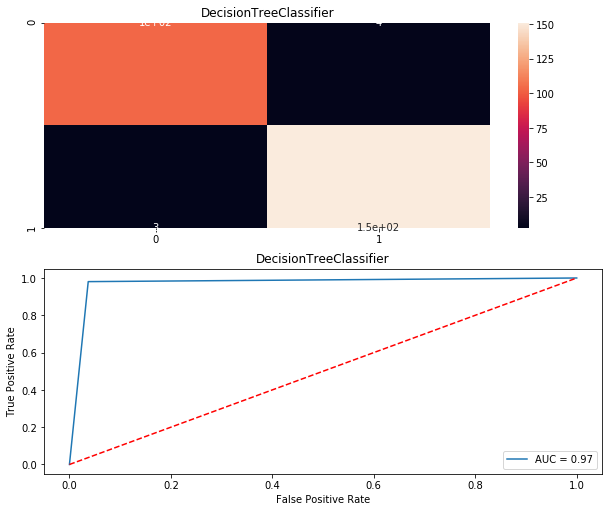

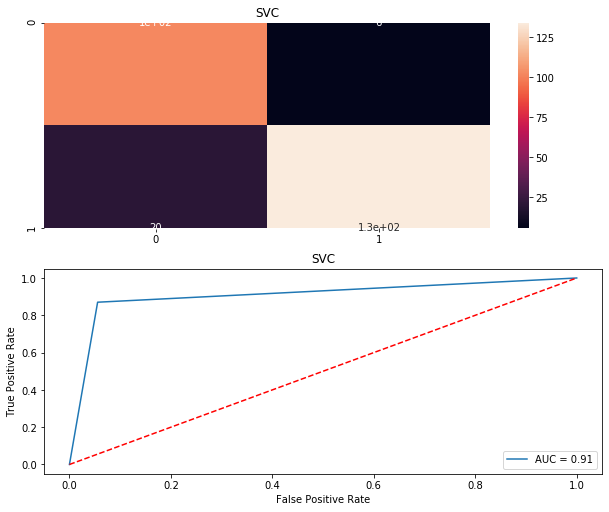

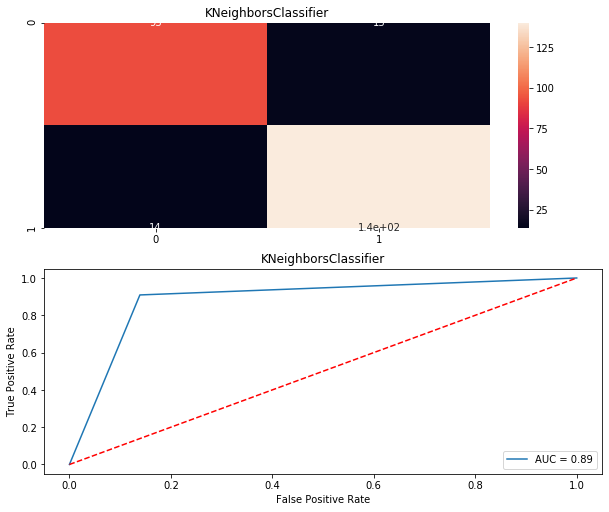

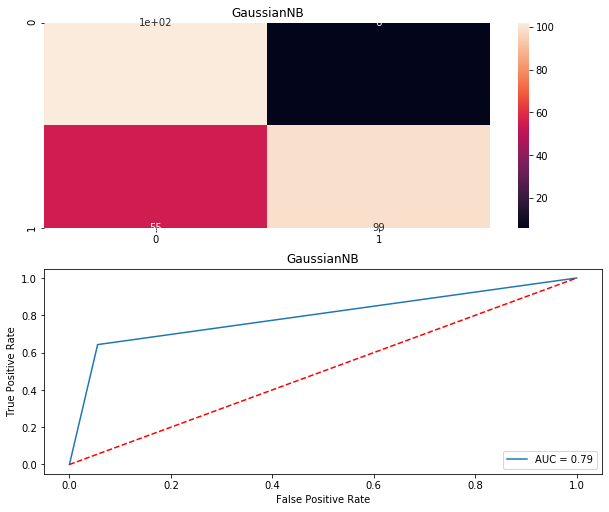

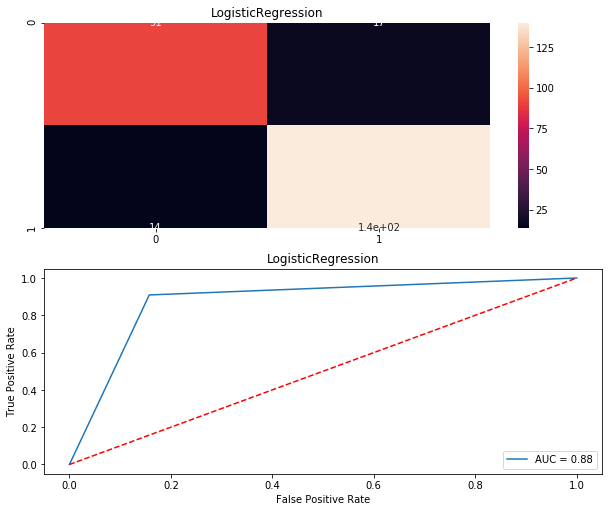

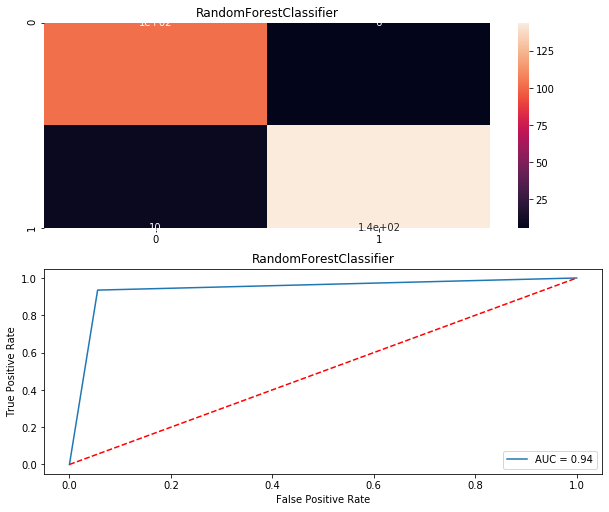

In [114]:
Model=[]
Score=[]
CVS=[]
rocscore=[]
for name,model in models:
    print('****************', name, '****************')
    print('\n')
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    print('\n')
    AS= accuracy_score(test_y,pre)
    print('Accuracy Score = ', AS)
    Score.append(AS*100)
    print('\n')
    SC=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Value Score = ', SC)
    CVS.append(SC*100)
    print('\n')
    false_positive_rate, true_positive_rate,thresolds= roc_curve(test_y,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification_report \n', classification_report(test_y,pre))
    print('\n')
    cm= confusion_matrix(test_y,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [115]:
result= pd.DataFrame({'Model' : Model, 'Accuracy_Score' : Score, 'Cross_val_score' : CVS, 'Roc_auc_curve': rocscore})
result

,Model,Accuracy_Score,Cross_val_score,Roc_auc_curve
0,DecisionTreeClassifier,97.328244,98.009982,97.174122
1,SVC,90.076336,90.602947,90.728716
2,KNeighborsClassifier,88.931298,89.229479,88.510101
3,GaussianNB,76.717557,72.186987,79.365079
4,LogisticRegression,88.167939,88.232380,87.584175
5,RandomForestClassifier,93.893130,94.723981,93.975469


** From above table we can see that we are getting best results by DecisionTreeClassifier technique,
so we can use this technique to train our model and to get best prediction results **

In [116]:
# Finally we save the final model using Joblib
from sklearn.externals import joblib 
  

joblib.dump(DT, 'DT_SBI_insurance.pkl')

['DT_SBI_insurance.pkl']

** This is the best and final model we have saved **